In [1]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('data/wc_docu/alice.txt') as fp:
    text = fp.read()

In [3]:
len(text), text[:1000]

(145190,
 "癤풮roject Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice's Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and wh

In [4]:
!dir  data\images

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: ACD6-B35F

 C:\Users\82106\연습\data\images 디렉터리

2022-06-14  오후 11:15    <DIR>          .
2022-06-14  오후 11:15    <DIR>          ..
2021-04-21  오후 05:58           416,516 alice_color.png
2019-05-03  오전 02:54             7,339 alice_shadow.png
2019-05-03  오전 02:54            78,856 heart.jpg
2022-06-14  오후 11:13           662,434 images.zip
2021-04-21  오후 06:23           151,546 mask_ahn_palm.jpg
2019-05-03  오전 02:54             7,339 mask_alice.png
2019-05-03  오전 02:54            12,601 mask_stormtrooper.png
               7개 파일           1,336,631 바이트
               2개 디렉터리  185,331,040,256 바이트 남음


In [5]:
# 사진 데이터를 pil 패키지의 Image를 활용해서 0~255 데이터로 읽어왔다.
alice_mask = np.array(Image.open('data/images/alice_shadow.png'))

In [6]:
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

(-0.5, 899.5, 899.5, -0.5)

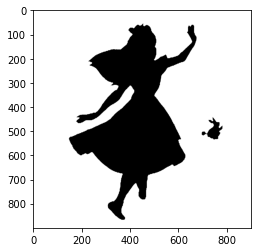

In [7]:
# plt.imshow()는 수치 데이터 -> image데이터로 변환해줌
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis('on')     # on/off

In [8]:
# STOPWORDS : 많은 빈도로 나오는 관사, 전치사 모아놓은 데이터
stopwords =set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [9]:
params = {
    "width"  : 800,
    "height" : 600, 
    "max_words" : 2000,
    "background_color" :"white",
    "mask"      : alice_mask, #이미지 마스크
    "stopwords" : stopwords #앞단에서 미리 가공해서 재사용한다.
}

# wordcolud_4 = WordCloud(background_color = 'white', max_words=2000, mask=alice_mask, stopwords=stopwords)
wordcolud_4 = WordCloud(**params)
wordcolud_4 = wordcolud_4.generate(text)
wordcolud_4.words_

{'said': 1.0,
 'Alice': 0.7225433526011561,
 'said Alice': 0.3352601156069364,
 'little': 0.31213872832369943,
 'one': 0.29190751445086704,
 'know': 0.26011560693641617,
 'went': 0.2398843930635838,
 'thing': 0.23121387283236994,
 'time': 0.22254335260115607,
 'Queen': 0.21965317919075145,
 'see': 0.1936416184971098,
 'King': 0.18497109826589594,
 'well': 0.18208092485549132,
 'now': 0.17341040462427745,
 'head': 0.17341040462427745,
 'began': 0.1676300578034682,
 'way': 0.16473988439306358,
 'Hatter': 0.16473988439306358,
 'Mock Turtle': 0.16184971098265896,
 'say': 0.15895953757225434,
 'Gryphon': 0.15895953757225434,
 'think': 0.1531791907514451,
 'quite': 0.15028901734104047,
 'much': 0.14739884393063585,
 'first': 0.14739884393063585,
 'thought': 0.14450867052023122,
 'go': 0.14450867052023122,
 'come': 0.13872832369942195,
 'never': 0.13583815028901733,
 'voice': 0.1329479768786127,
 'looked': 0.13005780346820808,
 'got': 0.13005780346820808,
 'must': 0.12716763005780346,
 'Cat':

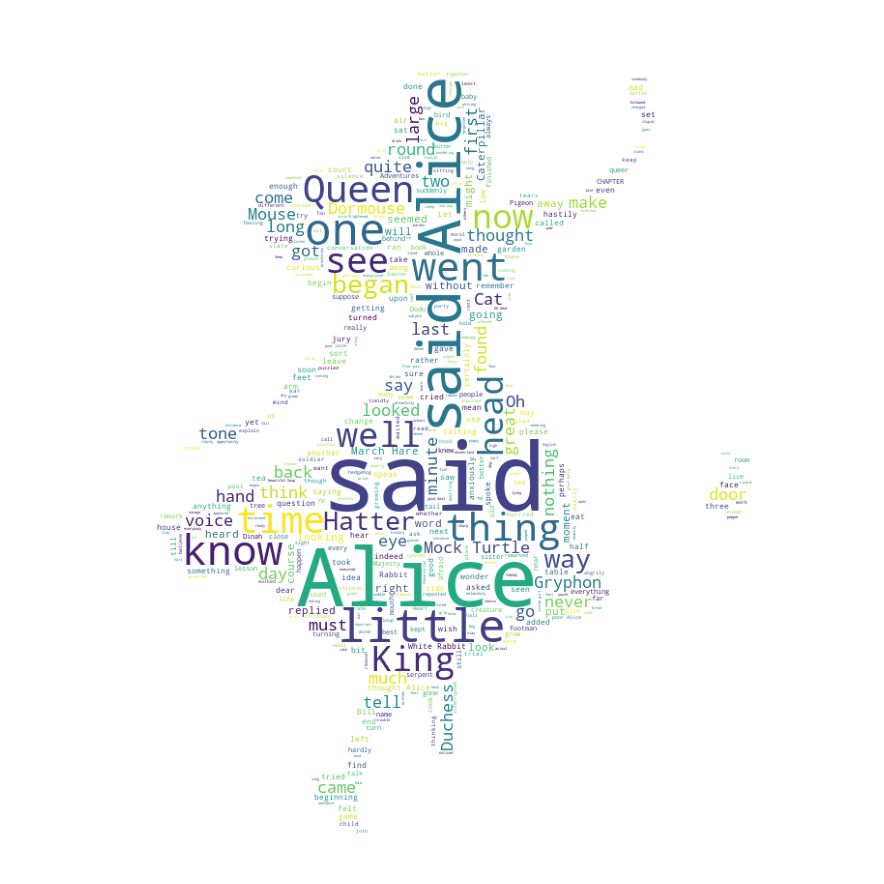

In [10]:
save_img = 'wordcloud/alice_story.png'

plt.figure(figsize=(24,16))
plt.imshow(wordcolud_4)
plt.axis('off')
plt.savefig(save_img)

(-0.5, 899.5, 899.5, -0.5)

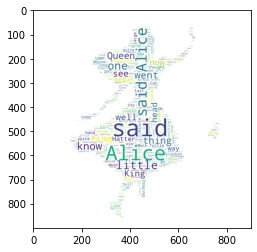

In [11]:
plt.imshow(wordcolud_4)
plt.axis('on')

(-0.5, 899.5, 899.5, -0.5)

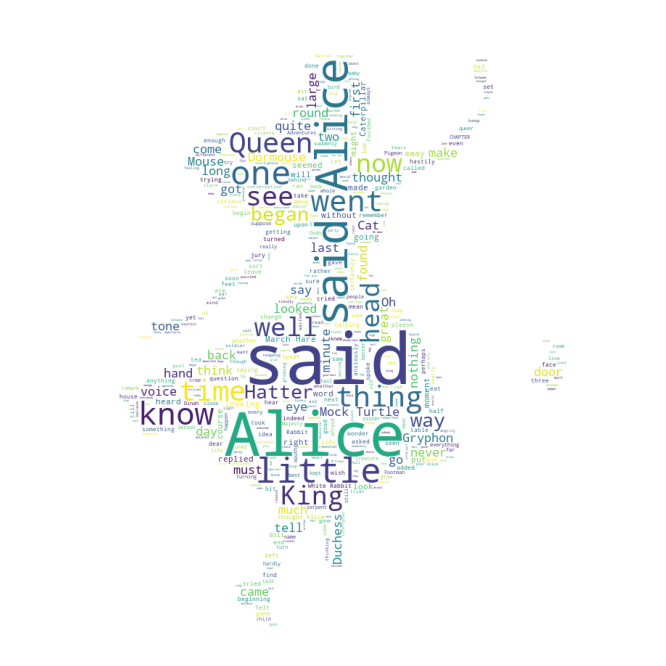

In [12]:
plt.figure(figsize=(12,12))
plt.imshow(wordcolud_4)
plt.axis('off')

In [13]:
params = {
    "width"  : 800,
    "height" : 600, 
    "max_words" : 2000,
    "background_color" :"white",
    "mask"      : alice_mask,
    "stopwords" : stopwords
}

# wordcolud_4 = WordCloud(background_color = 'white', max_words=2000, mask=alice_mask, stopwords=stopwords)
wordcolud_4 = WordCloud(**params)
wordcolud_4 = wordcolud_4.generate(text)
wordcolud_4.words_

{'said': 1.0,
 'Alice': 0.7225433526011561,
 'said Alice': 0.3352601156069364,
 'little': 0.31213872832369943,
 'one': 0.29190751445086704,
 'know': 0.26011560693641617,
 'went': 0.2398843930635838,
 'thing': 0.23121387283236994,
 'time': 0.22254335260115607,
 'Queen': 0.21965317919075145,
 'see': 0.1936416184971098,
 'King': 0.18497109826589594,
 'well': 0.18208092485549132,
 'now': 0.17341040462427745,
 'head': 0.17341040462427745,
 'began': 0.1676300578034682,
 'way': 0.16473988439306358,
 'Hatter': 0.16473988439306358,
 'Mock Turtle': 0.16184971098265896,
 'say': 0.15895953757225434,
 'Gryphon': 0.15895953757225434,
 'think': 0.1531791907514451,
 'quite': 0.15028901734104047,
 'much': 0.14739884393063585,
 'first': 0.14739884393063585,
 'thought': 0.14450867052023122,
 'go': 0.14450867052023122,
 'come': 0.13872832369942195,
 'never': 0.13583815028901733,
 'voice': 0.1329479768786127,
 'looked': 0.13005780346820808,
 'got': 0.13005780346820808,
 'must': 0.12716763005780346,
 'Cat':

In [15]:
# with open('wc_docu/alice.txt') as fp:
#     text = fp.read()
# text = open('alice.txt').read()

alice_color = np.array(Image.open('data/images/alice_color.png'))
# jb_2 = np.array(Image.open('data/images/jb_2.png'))

stopwords = set(STOPWORDS)

# 카운팅 하고싶지 않은 단어 추가
stopwords.add('said') #빼주기 위해 스탑월드에 더해준다.       
stopwords.add('said Alice') #빼주기 위해 스탑월드에 더해준다.

In [17]:
params = {
    "width"     : 600,
    "height"    : 600, 
    "max_words" : 2000,
    "max_font_size" : 40, 
    "random_state"  : 42,
    "background_color" :"white",
    "mask"      : alice_color,
    "stopwords" : stopwords
}

wordcolud_5 = WordCloud(**params)
wordcolud_5 = wordcolud_5.generate(text) 
#텍스트를 넘겨주는 함수이다.
# wordcolud_5.words_

In [ ]:
# plt.figure(figsize=(1,1))
# plt.imshow(jb_2)
# plt.axis('off')

(-0.5, 599.5, 799.5, -0.5)

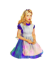

In [18]:
plt.figure(figsize=(1,1))
plt.imshow(alice_color)
plt.axis('off')

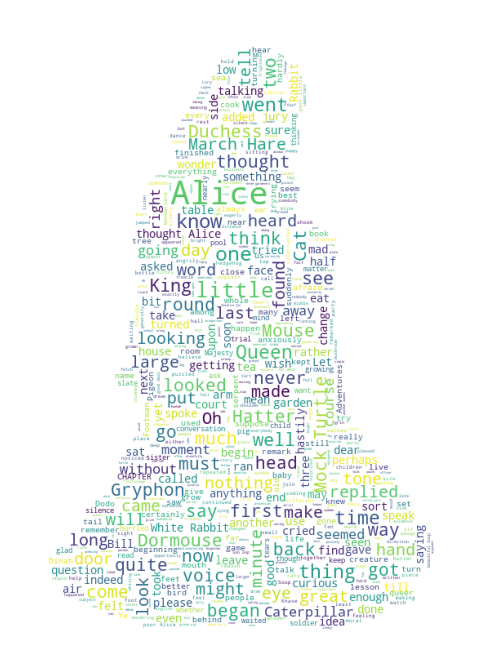

In [19]:
save_img = 'wordcloud/alice_story5.png'

plt.figure(figsize=(12, 12))
plt.imshow(wordcolud_5)
plt.axis('off')
plt.savefig(save_img)

In [20]:
from wordcloud import ImageColorGenerator

In [22]:
alice_color = np.array(Image.open('data/images/alice_color.png'))
image_colors = ImageColorGenerator(alice_color)

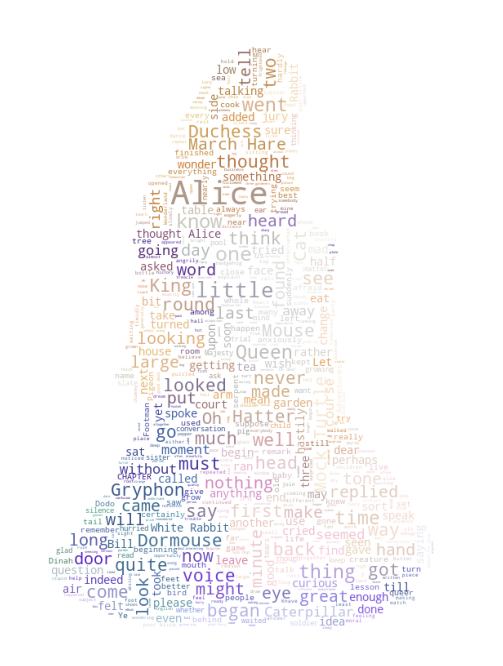

In [23]:
save_img = 'wordcloud/alice_color6.png'
plt.figure(figsize=(12,12))
# wordcloud_5.recolr(ImageColorGenerator(numpy이미지 파일))
plt.imshow(wordcolud_5.recolor(color_func=image_colors))
# color_func -> jb이미지 색깔에 맞게
plt.axis('off')
plt.savefig(save_img)